# 샘플 데이터와 Hierarchical Clustering

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

## 1. Data
### 1.1 Sample data
Hierarchical Clustering 정의에서 정리한 데이터를 이용해 예제를 실습

In [2]:
data = np.array(
    [
        (1,5),
        (2,4),
        (4,6),
        (4,3),
        (5,3)
    ]
)

In [3]:
data

array([[1, 5],
       [2, 4],
       [4, 6],
       [4, 3],
       [5, 3]])

## 2. Hierarchical Clustering
Hierarchical Clustering은 `sklearn.cluster`의 `AgglomerativeClustering`을 이용함  

사용할 수 있는 연결법은 4가지로 다음과 같음
1. 최단 연결법
2. 최장 연결법
3. 평균 연결법
4. 중심 연결법

이를 적용하기 위해서는 `linkage` argument를 통해 가능  
- average
  - 평균 연결법
- complete
  - 최장 연결법
- single
  - 최단 연결법
- ward
  - 중심 연결법

기본 값은 `ward`임


### 2.1 학습  
최단 연결법 사용해서 진행

In [5]:
from sklearn.cluster import AgglomerativeClustering

single_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage='single'
)

In [6]:
single_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='single', n_clusters=None)

### 2.2 Dendrogram

In [7]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
  counts = np.zeros(model.children_.shape[0])
  n_samples = len(model.labels_)
  for i, merge in enumerate(model.children_):
    current_count = 0
    for child_idx in merge:
      if child_idx < n_samples:
        current_count += 1  # leaf node
      else:
        current_count += counts[child_idx - n_samples]
    counts[i] = current_count

  linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

  dendrogram(linkage_matrix, **kwargs, labels=["A", "B", "C", "D", "E"])


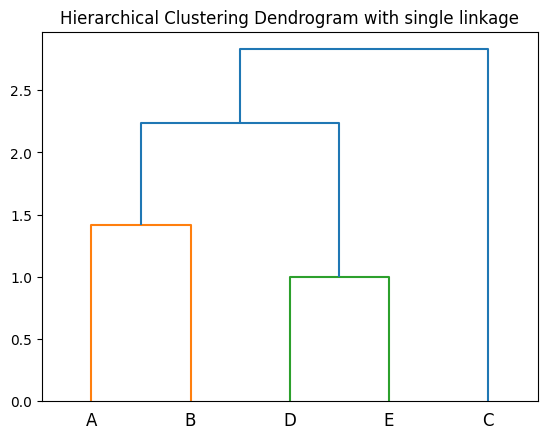

In [9]:
plt.title("Hierarchical Clustering Dendrogram with single linkage")
plot_dendrogram(single_cluster, truncate_mode='level', p=3)
plt.show()

### 2.3 여러 개의 클러스터
위에서 사용한 argument들은 데이터 전부를 묶는 방식의 Clustering  
이제 n개의 clustering으로 만들어복  

#### 2.3.1 2개의 클러스터

In [10]:
single_cluster_2 = AgglomerativeClustering(
    n_clusters=2, linkage="single"
)

In [11]:
single_cluster_2.fit(data)

AgglomerativeClustering(linkage='single')

In [13]:
single_cluster_2.labels_  # [A, B, C, D, E] 으로, C만 다른 그룹으로 맵핑된 것을 확인할 수 있음

array([0, 0, 1, 0, 0])

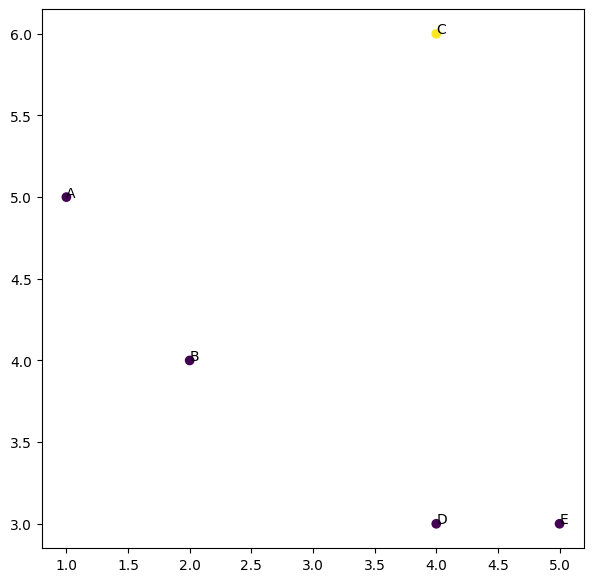

In [14]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_2.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
  plt.annotate(txt, (data[i, 0], data[i, 1]))

#### 2.3.2 3개의 클러스터

In [15]:
single_cluster_3 = AgglomerativeClustering(
    n_clusters=3, linkage="single"
)

In [16]:
single_cluster_3.fit(data)

AgglomerativeClustering(linkage='single', n_clusters=3)

In [17]:
single_cluster_3.labels_

array([0, 0, 1, 2, 2])

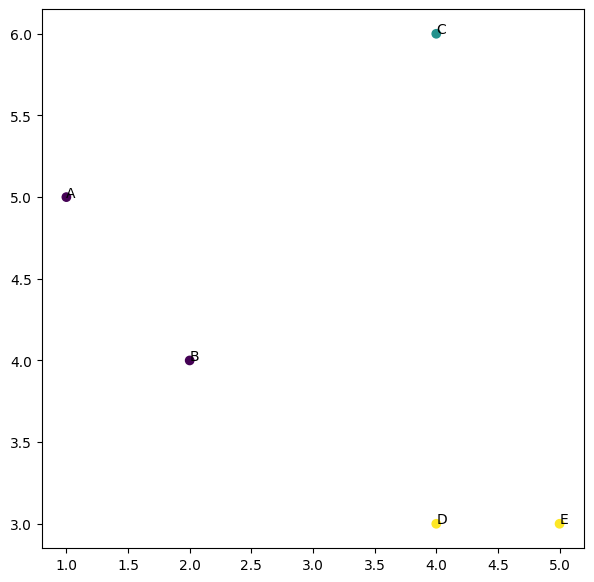

In [18]:
plt.figure(figsize=(7, 7))
plt.scatter(data[:, 0], data[:, 1], c=single_cluster_3.labels_)
for i, txt in enumerate(["A", "B", "C", "D", "E"]):
  plt.annotate(txt, (data[i, 0], data[i, 1]))

## 3. 다른 연결법

### 3.1 평균 연결법

In [19]:
avg_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="average"
)

In [20]:
avg_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='average',
                        n_clusters=None)

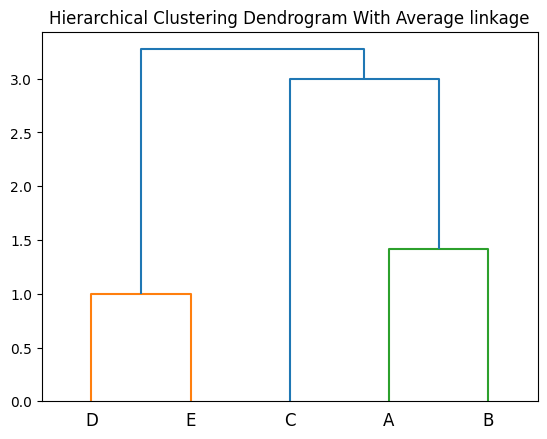

In [22]:
plt.title("Hierarchical Clustering Dendrogram With Average linkage")
plot_dendrogram(avg_cluster, truncate_mode="level", p=3)
plt.show()

### 3.2 최장 연결법


In [23]:
max_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="complete"
)

In [24]:
max_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

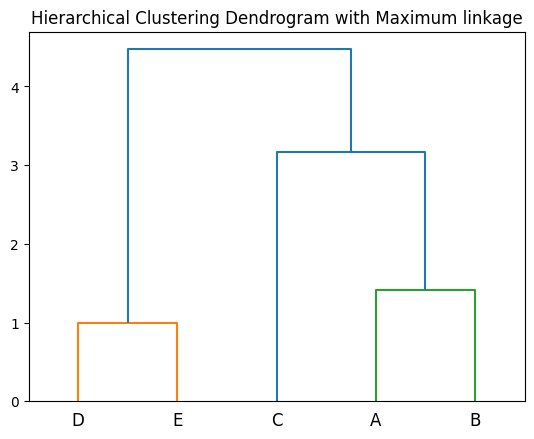

In [26]:
plt.title("Hierarchical Clustering Dendrogram with Maximum linkage")
plot_dendrogram(max_cluster, truncate_mode='level', p=3)
plt.show()

### 3.3 중심 연결법

In [27]:
centroid_cluster = AgglomerativeClustering(
    distance_threshold=0, n_clusters=None, linkage="ward"
)

In [29]:
centroid_cluster.fit(data)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

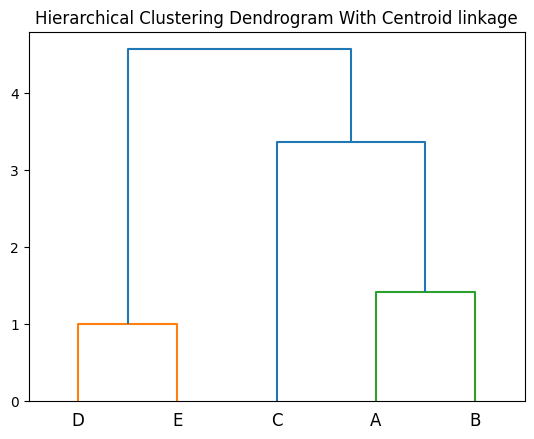

In [30]:
plt.title("Hierarchical Clustering Dendrogram With Centroid linkage")
plot_dendrogram(centroid_cluster, truncate_mode="level", p=3)
plt.show()

## 4. 마무리

In [31]:
clusters = [
    ["Single", single_cluster],
    ["Average", avg_cluster],
    ["Maximum", max_cluster],
    ["Centroid", centroid_cluster]
]

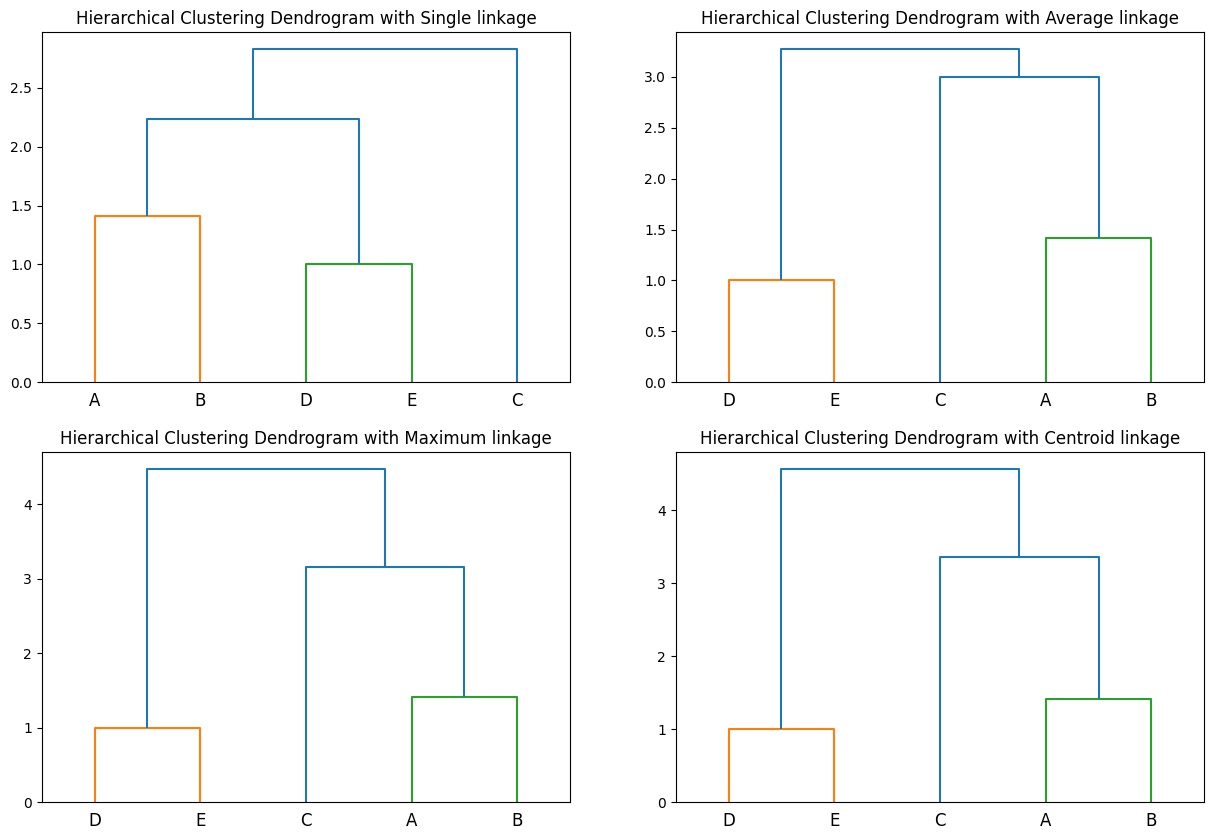

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for idx, (name, cluster) in enumerate(clusters):
  ax = axes[idx//2, idx%2]
  ax.set_title(f"Hierarchical Clustering Dendrogram with {name} linkage")
  plot_dendrogram(cluster, truncate_mode="level", p=3, ax=ax)